<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_6_kldiv.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — KL Divergence

In this assignment, you will learn the basics of **Kullback–Leibler (KL) divergence**. KL divergence measures how one probability distribution differs from another.

---

## Learning Goals
- Understand the definition of KL divergence  
- Compute KL divergence between two Gaussian distributions  
- Understand why KL divergence is always non-negative  
- Relate KL divergence to Maximum Likelihood Estimation (MLE)  
- Compare forward vs reverse KL divergence


## 1. Definition

For discrete distributions:

$D_{\text{KL}}(P \,\|\, Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}$

For continuous distributions:

$D_{\text{KL}}(P \,\|\, Q) = \int p(x) \log \frac{p(x)}{q(x)} dx$

- KL divergence is **not symmetric**: $D_{\text{KL}}(P \,\|\, Q) \neq D_{\text{KL}}(Q \,\|\, P)$
- KL divergence is **not a distance metric**, but it measures how well $Q$ approximates $P$.  


### Exercise 1
In your own words, explain what KL divergence measures.  
Give a real-world analogy (e.g., communication, language modeling).


KL divergence measures the "information loss" or "surprise". It's an asymmetric measure, meaning the divergence from P to Q is not the same as from Q to P.

A good analogy refers to language translation where Person A gave a sentence in english. Person B and C translate to other language based on the knowledge they have person b translated with grammer mistakes but good explantion and person C translated with bad explanation but grammatically correct. DL divergence measures the what each person B and C lost in their translation. The two values would likely be different, and the better translation would have a lower KL divergence from the original meaning


## 2. Example: KL Divergence Between Two Gaussians

If $P = \mathcal{N}(\mu_p, \sigma_p^2)$ and $Q = \mathcal{N}(\mu_q, \sigma_q^2)$, the KL divergence is:

$D_{\text{KL}}(P \,\|\, Q) = \log \frac{\sigma_q}{\sigma_p} + \frac{\sigma_p^2 + (\mu_p - \mu_q)^2}{2\sigma_q^2} - \frac{1}{2}$


In [2]:
import numpy as np

def kl_gaussian(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q/sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2)/(2*sigma_q**2) - 0.5

# Example
print("KL(P||Q) with mu_p=0, sigma_p=1, mu_q=1, sigma_q=2:")
kl_gaussian(0, 1, 1, 2)




KL(P||Q) with mu_p=0, sigma_p=1, mu_q=1, sigma_q=2:


np.float64(0.4431471805599453)

### Exercise 2
- Compute ${\text{KL}}(P \,\|\, Q)$ for several pairs of Gaussian distributions.  
- Which matters more: differences in mean, or differences in variance?  
- Plot ${\text{KL}}(P \,\|\, Q)$ as $μ_q$ varies from -3 to 3, holding σ fixed.


In [4]:
# Your code here
mu_p, sigma_p = 0, 1
kl_diff_mean = kl_gaussian(mu_p, sigma_p, mu_q=1, sigma_q=1)
print(f"P=N(0,1), Q=N(1,1) -> KL(P||Q) = {kl_diff_mean:.4f}")

# Case 2: Same mean, different (larger) variance
kl_diff_var_large = kl_gaussian(mu_p, sigma_p, mu_q=0, sigma_q=2)
print(f"P=N(0,1), Q=N(0,2) -> KL(P||Q) = {kl_diff_var_large:.4f}")

# Case 3: Same mean, different (smaller) variance
kl_diff_var_small = kl_gaussian(mu_p, sigma_p, mu_q=0, sigma_q=0.5)
print(f"P=N(0,1), Q=N(0,0.5) -> KL(P||Q) = {kl_diff_var_small:.4f}")

P=N(0,1), Q=N(1,1) -> KL(P||Q) = 0.5000
P=N(0,1), Q=N(0,2) -> KL(P||Q) = 0.3181
P=N(0,1), Q=N(0,0.5) -> KL(P||Q) = 0.8069


What matters more

The impact of mean vs. variance is  depends on their relative values.
From the formula, the difference in means is squared, $(μ_{p} - μ_{q})^2 $ , which suggests a strong penalty.
However, this penalty is scaled by $1/(2\sigma_{q}²)$, so if the approximating distribution Q has a large variance, the difference in mean's importance is  less.
if Q has a very small variance, even a small difference in means can lead to a very large KL divergence.

In [5]:
mu_q_values = np.linspace(-3, 3, 200)
# P = N(0, 1), Q = N(mu_q, 1)
kl_values = kl_gaussian(mu_p=0, sigma_p=1, mu_q=mu_q_values, sigma_q=1)



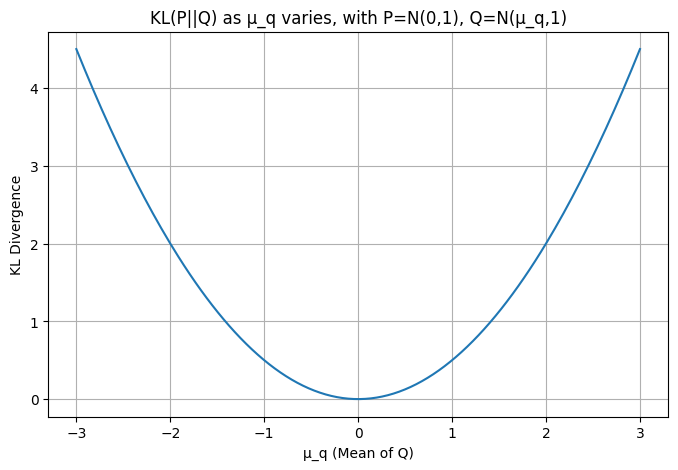

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(mu_q_values, kl_values)
plt.title("KL(P||Q) as μ_q varies, with P=N(0,1), Q=N(μ_q,1)")
plt.xlabel("μ_q (Mean of Q)")
plt.ylabel("KL Divergence")
plt.grid(True)
plt.show()

## 3. Non-Negativity of KL Divergence

**Gibbs’ Inequality**:  
$D_{\text{KL}}(P \,\|\, Q) \geq 0$

with equality if and only if $P = Q$.  
This means the "distance" is never negative.

Intuition: if you approximate $P$ with $Q$, you can never do better than the true distribution.


In [7]:
# Quick numerical experiment
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
kl = np.sum(p * np.log(p/q))
kl


np.float64(0.020135513550688863)

### Exercise 3
- Construct two different discrete distributions $P$ and $Q$.  
- Compute ${\text{KL}}(P \,\|\, Q)$ and ${\text{KL}}(Q \,\|\, P)$.  
- Verify that both are ≥ 0.  
- When do you get $\text{KL} = 0$?


In [8]:
# Your code here
p = np.array([0.1, 0.2, 0.7])
q = np.array([0.8, 0.1, 0.1])
assert np.isclose(np.sum(p), 1.0)
assert np.isclose(np.sum(q), 1.0)
kl_p_q = np.sum(p * np.log(p/q))
kl_q_p = np.sum(q * np.log(q/p))
print(f"KL(P||Q) = {kl_p_q:.4f}")
print(f"KL(Q||P) = {kl_q_p:.4f}")

KL(P||Q) = 1.2928
KL(Q||P) = 1.3996


In [11]:
print(f"\nIs KL(P||Q) >= 0? {'Yes' if kl_p_q >= 0 else 'No'}")
print(f"Is KL(Q||P) >= 0? {'Yes' if kl_q_p >= 0 else 'No'}")
print("This also demonstrates the asymmetry of KL Divergence: KL(P||Q) != KL(Q||P).")


Is KL(P||Q) >= 0? Yes
Is KL(Q||P) >= 0? Yes
This also demonstrates the asymmetry of KL Divergence: KL(P||Q) != KL(Q||P).


In [12]:
p_identical = np.array([0.3, 0.4, 0.3])
q_identical = np.array([0.3, 0.4, 0.3])
kl_zero = np.sum(p_identical * np.log(p_identical / q_identical))
print(f"When P=Q, KL(P||Q) = {kl_zero:.4f}")

When P=Q, KL(P||Q) = 0.0000


## 4. KL Divergence and Maximum Likelihood Estimation

Suppose data is generated from distribution P, and we fit model Qθ.  

- MLE maximizes likelihood:   
  $\theta^* = \arg \max_\theta \sum \log q_\theta(x_i)$
- Equivalent to minimizing:  
  $D_{\text{KL}}(P \,\|\, Q_\theta)$

Thus, **MLE is KL minimization**: we make our model Qθ as close as possible to the true distribution P.


### Exercise 4
Explain in your own words:
- Why minimizing ${\text{KL}}(P \,\|\, Q)$ is the same as maximizing likelihood.  
- Why this interpretation helps us understand model training.


Yes it is same as maximizing likelihood, because KL divergence formula can be split into like this
$$ D_{KL}(P||Q) = \Sigma_xP(x)logP(x) - \Sigma_xQ(x)logQ(x) $$
The first term is entropy of true data distribution and second term is negative cross-entropy. To minimize the entire KL divergence expression, we only need to minimize this second term since first term is constant which is also maximizing the log likelihood.

This interpretation is incredibly helpful because it reframes model training, It helps us understand that our model is essentially trying to get to close to reality with KL divergence being the measure of that closeness.

## 5. Forward vs Reverse KL

- **Forward KL:** $D_{\text{KL}}(P \,\|\, Q)$  
  - Penalizes missing modes ($Q$ must cover all support of $P$).  
  - "Mode covering."

- **Reverse KL:** $D_{\text{KL}}(Q \,\|\, P)$  
  - Penalizes putting mass where $P$ has none.  
  - "Mode seeking."

This asymmetry explains why different algorithms (e.g. variational inference vs expectation propagation) behave differently.


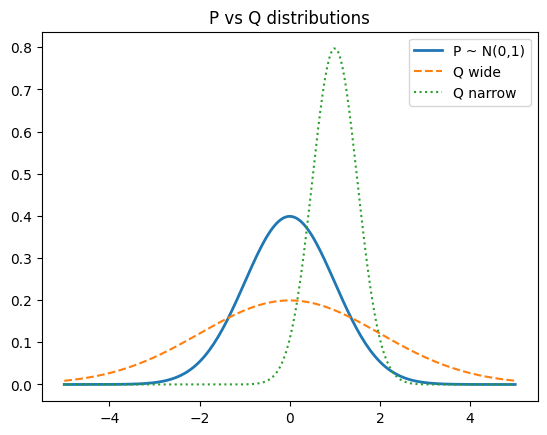

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-5, 5, 200)
p = stats.norm(0, 1).pdf(x)   # true distribution
q1 = stats.norm(0, 2).pdf(x)  # wide Q
q2 = stats.norm(1, 0.5).pdf(x) # narrow Q

plt.plot(x, p, label="P ~ N(0,1)", linewidth=2)
plt.plot(x, q1, label="Q wide", linestyle="--")
plt.plot(x, q2, label="Q narrow", linestyle=":")
plt.legend()
plt.title("P vs Q distributions")
plt.show()


### Exercise 5
1. Compute both ${\text{KL}}(P \,\|\, Q)$ and ${\text{KL}}(Q \,\|\, P)$ for $P=N(0,1)$, $Q=N(1,0.5)$.  
2. Which is larger? Why?  
3. In which case would forward KL be more appropriate? Reverse KL?


In [14]:
# Your code here
# P = N(0, 1)
mu_p, sigma_p = 0, 1
# Q = N(1, 0.5)
mu_q, sigma_q = 1, 0.5
forward_kl = kl_gaussian(mu_p, sigma_p, mu_q, sigma_q)
reverse_kl = kl_gaussian(mu_q, sigma_q, mu_p, sigma_p)
print(f"KL(P||Q) = {forward_kl:.4f}")
print(f"KL(Q||P) = {reverse_kl:.4f}")

KL(P||Q) = 2.8069
KL(Q||P) = 0.8181


Forward KL, averages over p and Reverse KL averages over q.
The forward Kl divergence is larger and penalizes the q if it assigned with low probability.Here, P=N(0,1) is wide, and Q=N(1,0.5) is a narrow distribution shifted away from P's mean. Q assigns very low probability to values where P has significant mass.
It penalizes q if it assigns high probability where p has low probability.


## 6. Reflection

### Exercise 6
Answer in 2–3 sentences each:

1. Why is KL divergence always non-negative?  
2. How does KL divergence connect to MLE?  
3. Why do forward and reverse KL behave differently?  


Your response here
Gibbs' inequality is equation that effects KL divergence to be always non-negative
Yes it is same as maximizing likelihood, because KL divergence formula can be split into like this
$$ D_{KL}(P||Q) = \Sigma_xP(x)logP(x) - \Sigma_xQ(x)logQ(x) $$
The first term is entropy of true data distribution and second term is negative cross-entropy. To minimize the entire KL divergence expression, we only need to minimize this second term since first term is constant which is also maximizing the log likelihood.
They behave differently because of the inherent asymmetry in the KL formula.